# Homework 2 Computational Problems 

## Problem 1: The volume of the unit ball in high dimensions

Recall the definition of the unit $p$-ball in $n$-dimensions is the following subset of $\mathbb{R}^n$:

$$
\mathcal{B}_{n,p} = \{\boldsymbol{x}\in\mathbb{R}^n : \|\boldsymbol{x}\|_p \leq 1\}
$$

where the $p$-norm is 

$$
\|\boldsymbol{x}\|_p = \left(\sum_{i=1}^n x_i^p\right)^{1/p}.
$$

When $p=2$, the unit ball in $n=2$ dimensions is simply the disk centered at the origin with radius $1$, and therefore has area equal to $\pi$. 

In this problem, we investigate what happens to the volume of the unit 2-ball as the dimension $n$ grows, and find that it behaves in a surprising way.

To do this, perform the following steps:

- Define a function `estimate_unit_ball_volume(n)` which estimates the volume of the unit 2-ball in $n$ dimensions using the following approach (analogous to what we did in lab): first, sample $k=1,000,000$ points at random from the unit box $[-1,1]^n$ (you can use the function `np.random.uniform` for this). Then, compute the fraction $q$ of these points which satisfy $\|\boldsymbol{x}\|_2 \leq 1$. Finally, multiply this number by the volume of the unit box, which is $2^n$, to get an estimate for the volume of $\mathcal{B}_{n,2}$. 
- Next, use this function to estimate the volume of $\mathcal{B}_{n,2}$ for $n=1,2,3,\dots,15$, and plot the volumes as a function of $n$. 

What is the general behavior of the volume as a function of $n$? At what value of $n$ is this volume maximized? What appears to happen to the volume as $n$ grows?

## Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set1')

In [2]:
def estimate_unit_ball_volume(n, k=1000000):
    x = np.random.uniform(-1,1,size=(k, n))
    norms = np.linalg.norm(x, axis=1, ord=2)
    return (2**n)*np.mean(norms<=1)

5.255072


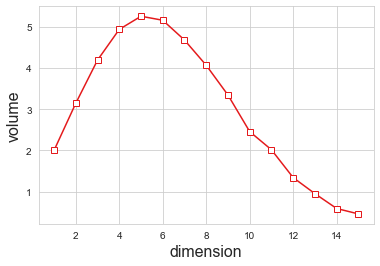

In [3]:
n_range = np.arange(1,16,1)

vols = []
for n in n_range:
    vols.append(estimate_unit_ball_volume(n))
    if n == 5:
        print(vols[-1])
plt.plot(n_range, vols, marker='s', markerfacecolor='white')
    
plt.xlabel('dimension', fontsize=16)
plt.ylabel('volume', fontsize=16)
plt.show()

## Problem 2: Where is the mass in the unit ball?

In this problem, we look at another suprising phenomenon in higher dimensions: in particular, we will show that the unit ball is essentially "hollow". To do this, perform the following simulation.

- Define a function `sample_from_unit_ball(n,k)` which generates $k$ random samples from the unit ball $\mathcal{B}_{n,2}$ in $n$-dimensions. Hint: you can use a very similar approach to the function you wrote in problem 1.
- For each $n = 2,4,6,8,10$, generate $k=50,000$ points from $\mathcal{B}_{n,2}$, compute their norms, and plot a histogram of these values (you can use the `matplotlib` function `plt.hist(data, density=True)` to do this). 

What do you see happens to the distribution of points? What does this mean geometrically about the unit ball? How do you reconcile this with the fact that the points we generated were uniformly distributed on $\mathcal{B}_{n,2}$? 

## Solution

In [5]:
def sample_from_unit_ball(n, k=1000000):
    x = np.random.uniform(-1,1,size=(k, n))
    norms = np.linalg.norm(x, axis=1, ord=2)
    return x[norms <= 1], norms[norms<=1]

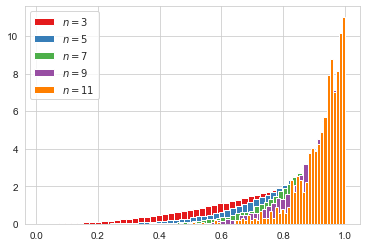

In [6]:
n_range = np.arange(2,12,2)

for n in n_range:
    _, norms = sample_from_unit_ball(n)
    plt.hist(norms, bins=50, label=r'$n=%s$' % n, density=True)

plt.legend()
plt.show()